In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
## here we are using the default seprator as , for csv dataset .so no need to specify is seprately otherwise 
##("housing.csv" , sep)

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
##now we want to predict median house value, so our target variable is median_house_value

In [6]:
## here we have some problems

## the first one is with attribute ocean proximity , we cannot feed this data directly to model(forest classifier, decision tree or anything else).



In [7]:
## check null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
## see from data above  ""4   total_bedrooms      20433 non-null  float64""

## this have some missing values because all other attributes have 20640 values

In [9]:
## to deal with this try 

##  dropping all not-a-number(nan) entries in the atrributes

## here we can infer that all atrributes have nan values except total_bedrooms, so simply drop them.

In [10]:
## data.dropna() , will drop all null values 
## inplace -True will save the new data set
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
##now we will split data in X and Y one will be training data and other will be testing data

In [13]:
from sklearn.model_selection import train_test_split

x= data.drop(['median_house_value'],axis = 1)
y= data['median_house_value']

In [14]:
## original data set is split in 
## x_train ,x_test
##y_train,y_test

# x= data without our target i.e median_house_value
# Y = our target data i.e median_house_value

## so our basic idea is 
# we will save 20% of both these x& Y as test data
# then we will use 80% remaining data to form out relations between x coordinates and y coordinates 
# i.e model will train itself to form a mapping between these x and y
#later we will use 20 of test data
x ## print x data-set
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [15]:
## now lets secure some percent of data as test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) ##we secured 20% data as test data


In [16]:
# here we have 4 set of data

#x_train data
#y_train data

#x_test data
#x_train data

In [17]:
#perform a join between x_train & y_train

train_data = x_train.join(y_train)

In [18]:
train_data   ## shows the joined input

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
7744,-118.16,33.94,25.0,5675.0,1224.0,3317.0,1119.0,3.9352,<1H OCEAN,232900.0
1443,-122.00,37.98,31.0,2030.0,337.0,867.0,341.0,5.0915,INLAND,193200.0
3137,-117.65,35.00,36.0,1184.0,316.0,672.0,241.0,1.9107,INLAND,39800.0
635,-122.16,37.71,36.0,666.0,132.0,366.0,134.0,3.4643,NEAR BAY,175000.0
9177,-118.52,34.40,5.0,7748.0,1557.0,4768.0,1393.0,5.3050,<1H OCEAN,311200.0
...,...,...,...,...,...,...,...,...,...,...
9921,-122.32,38.32,19.0,2922.0,417.0,1221.0,442.0,5.8002,NEAR BAY,238700.0
18689,-121.75,36.96,19.0,3461.0,634.0,2790.0,607.0,4.7569,<1H OCEAN,190800.0
9662,-120.51,41.35,16.0,2843.0,564.0,892.0,386.0,2.5074,INLAND,69100.0
13451,-117.41,34.09,21.0,3300.0,587.0,1896.0,572.0,3.6466,INLAND,130600.0


In [19]:
## till now we cannot access the attribute ocean_proxomity as i already mentioned we caanot directly feed text in our model

# but we can perform calculation on all other attributes.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

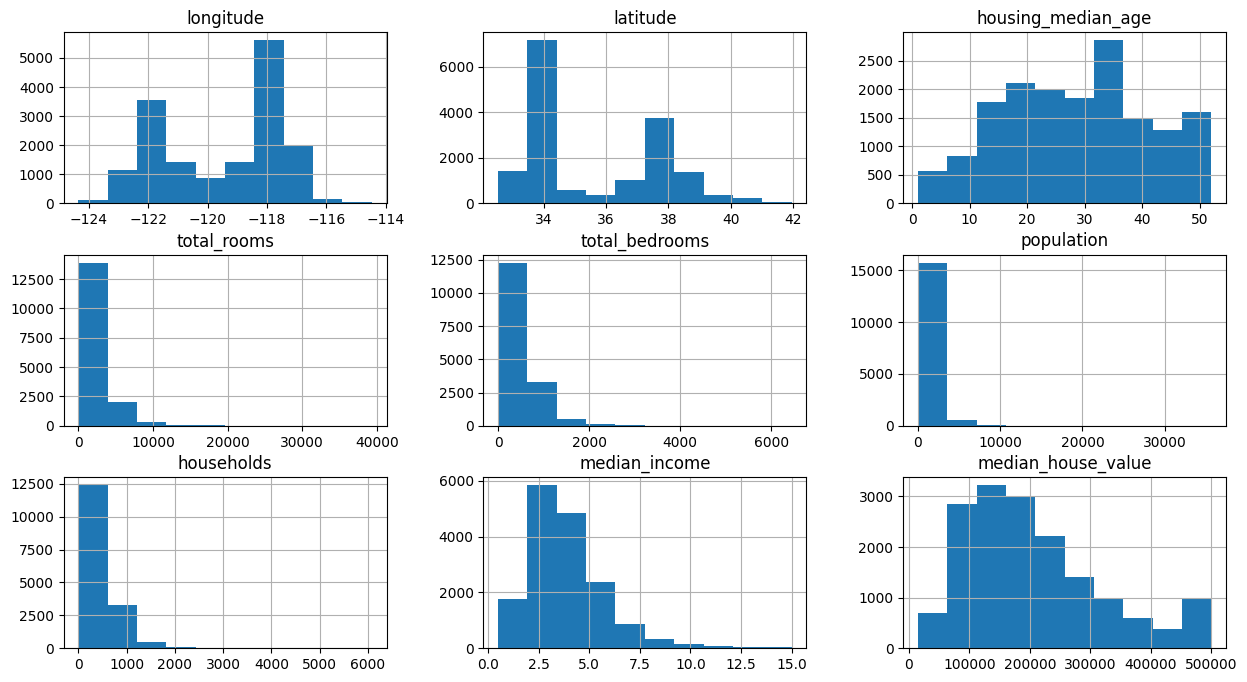

In [20]:
train_data.hist(figsize=(15,8))  # outputs histogram for joined data train_data

<Axes: >

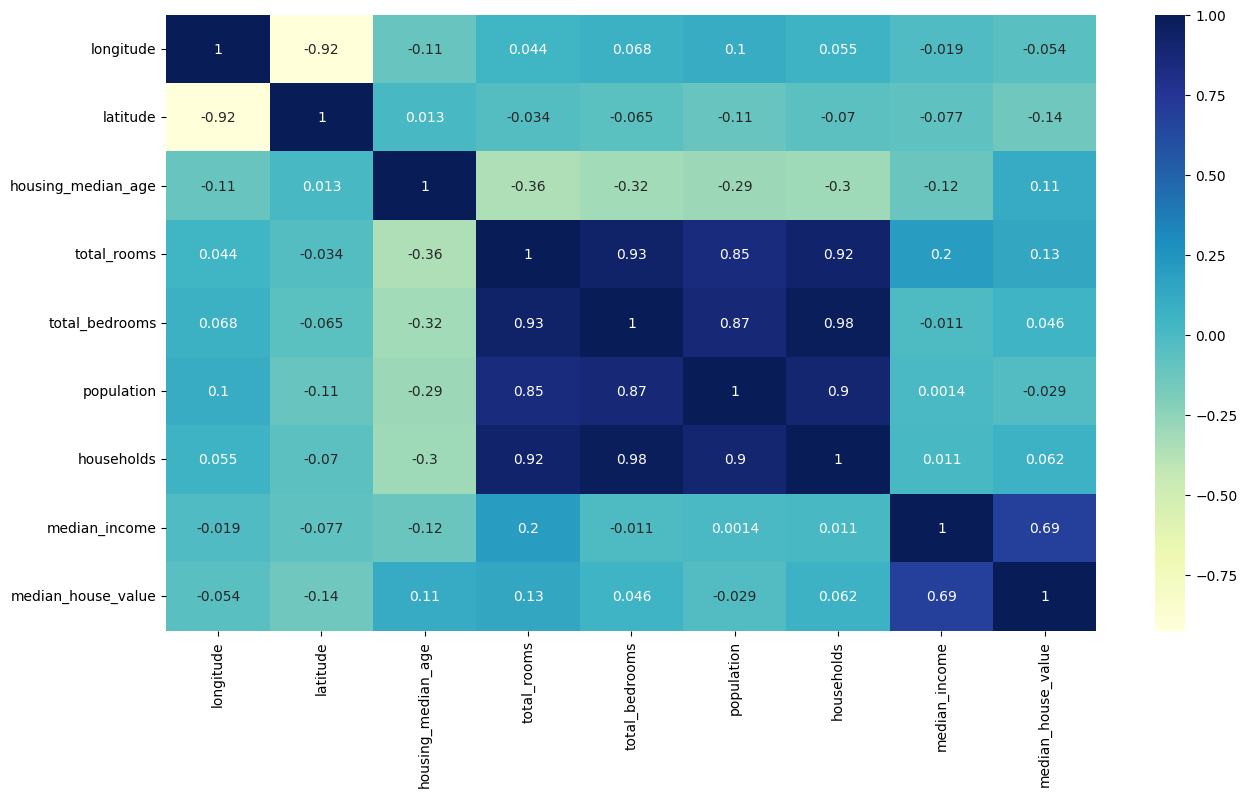

In [21]:
numeric_data = train_data.select_dtypes(include=[np.number])  
## without above line 
# you encountered suggests a ValueError while trying to calculate the correlation using the corr() function on a DataFrame object named train_data. The issue seems to be related to the conversion of the DataFrame to a NumPy array.

## to solve this 
#Subset the DataFrame: If there are non-numeric columns in your DataFrame, you can select only the numeric columns for correlation calculation. You can do this by using the select_dtypes() function to filter out the non-numeric columns. For example:


## plot a heat map 
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
## it will provide you corelation between all attributes

In [22]:
# till now we have just explored the data

In [23]:
# take log of some of the features available (left scew features)

train_data['total_rooms'] = np.log(train_data['total_rooms'] +1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] +1)
train_data['population'] = np.log(train_data['population'] +1)
train_data['households'] = np.log(train_data['households'] +1)                                   

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

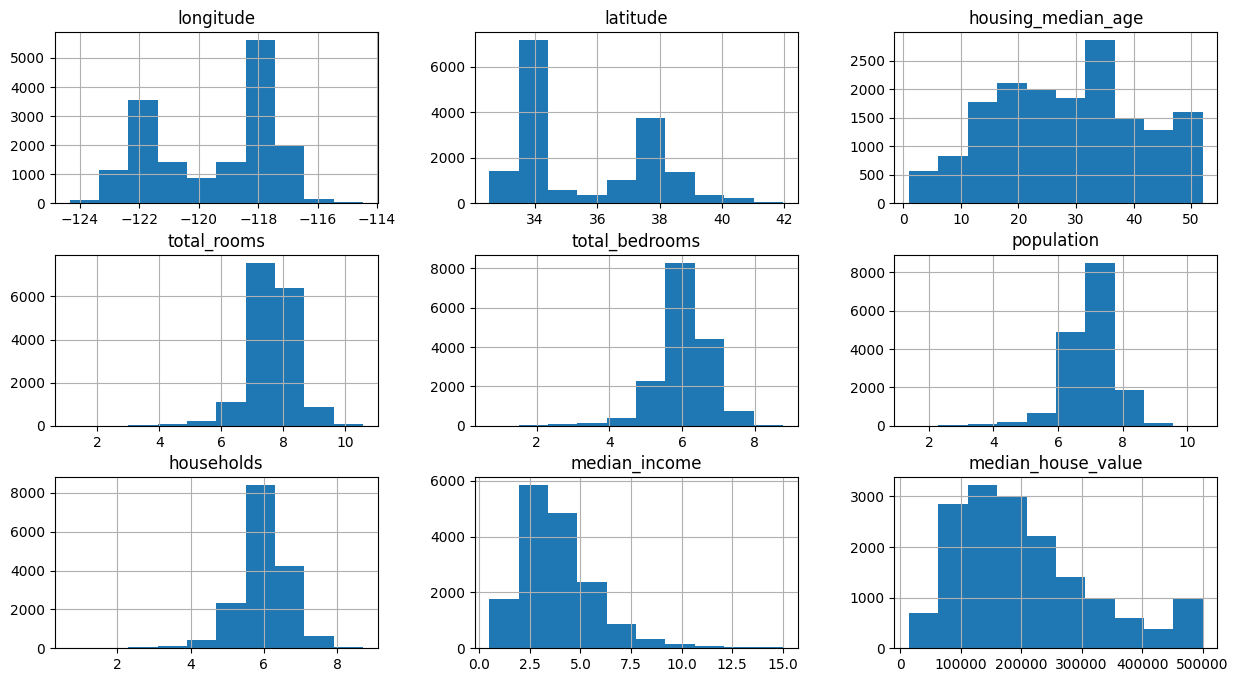

In [24]:
train_data.hist(figsize=(15,8))

In [25]:
# now we want to use ocean_proximity attribute
# so what we can do is we can assign them some numeric values in place of string values

# but it is suggest to assign some binary values to them instead of random values
## see here they have some random values

train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7244
INLAND        5147
NEAR OCEAN    2105
NEAR BAY      1848
ISLAND           2
Name: count, dtype: int64

In [26]:
pd.get_dummies(train_data.ocean_proximity)  #this will provide us with true and false value for a particular house on the basis of ocean proximity features 

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7744,True,False,False,False,False
1443,False,True,False,False,False
3137,False,True,False,False,False
635,False,False,False,True,False
9177,True,False,False,False,False
...,...,...,...,...,...
9921,False,False,False,True,False
18689,True,False,False,False,False
9662,False,True,False,False,False
13451,False,True,False,False,False


In [27]:
# join this data with train data
# also you can drop the ocean proximity to prune the dataset as we convetred it to true and false values

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

In [28]:
train_data   #we now have this type of dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7744,-118.16,33.94,25.0,8.644002,7.110696,8.107117,7.021084,3.9352,232900.0,True,False,False,False,False
1443,-122.00,37.98,31.0,7.616284,5.823046,6.766192,5.834811,5.0915,193200.0,False,True,False,False,False
3137,-117.65,35.00,36.0,7.077498,5.758902,6.511745,5.488938,1.9107,39800.0,False,True,False,False,False
635,-122.16,37.71,36.0,6.502790,4.890349,5.905362,4.905275,3.4643,175000.0,False,False,False,True,False
9177,-118.52,34.40,5.0,8.955319,7.351158,8.469892,7.239933,5.3050,311200.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,-122.32,38.32,19.0,7.980366,6.035481,7.108244,6.093570,5.8002,238700.0,False,False,False,True,False
18689,-121.75,36.96,19.0,8.149602,6.453625,7.934155,6.410175,4.7569,190800.0,True,False,False,False,False
9662,-120.51,41.35,16.0,7.952967,6.336826,6.794587,5.958425,2.5074,69100.0,False,True,False,False,False
13451,-117.41,34.09,21.0,8.101981,6.376727,7.548029,6.350886,3.6466,130600.0,False,True,False,False,False


<Axes: >

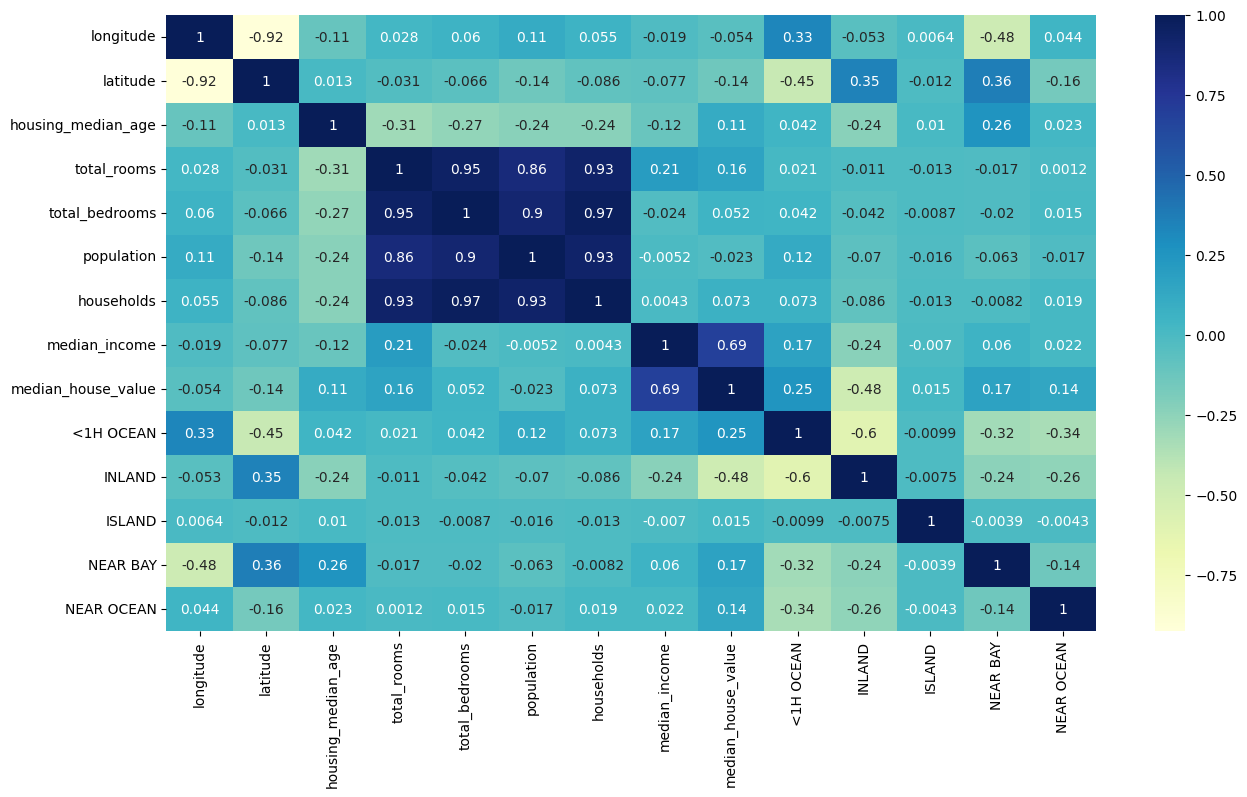

In [29]:
#let's again create a heap map

#numeric_data = train_data.select_dtypes(include=[np.number])  
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# pay attention to Inland correltion VS the Near Ocean correlation


<Axes: xlabel='latitude', ylabel='longitude'>

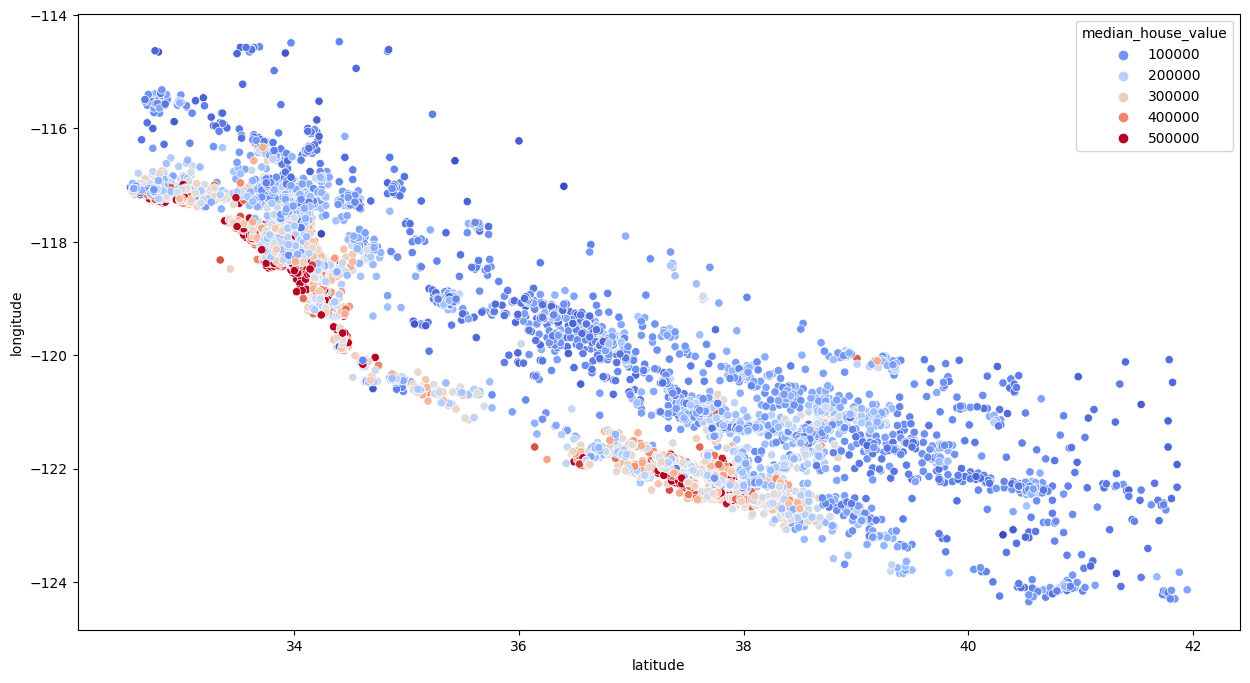

In [30]:
# now lets create the graph on basis of median_house_value  i.e  more is the median value hogher is prize we already had this info in begining

#red dot high price, blue dot low price
# you can see that all the houses on the costline have high price dtatpoints that are at lower side as compared to inland datapoints that are at higher portion of graph

plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue = "median_house_value", palette="coolwarm")

In [31]:
# now lets create a seprate feature on the bais of features that we have
# feature 1: bedroom_ratio = no. of bedrooms / room  

train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

In [32]:
# feature 2 :  household_rooms = total_rooms / households
# i.e the number of rooms per house

train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

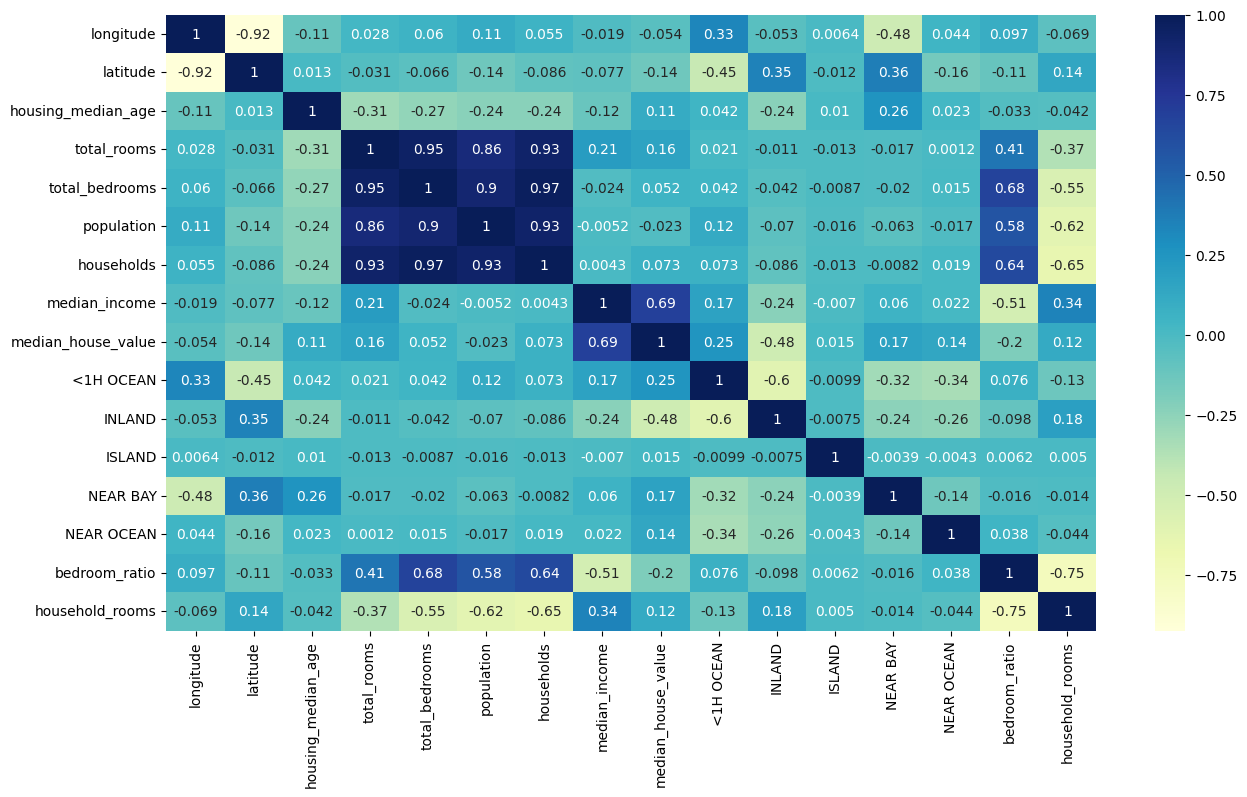

In [33]:
# lets again create a corelation heatmap

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

# scan the corelation of the new features that we created
## household_rooms have more corelation value as compared to bedroom_ratio

In [34]:
###########################################################
              #let's train some models" #
###########################################################    
    

In [35]:
# linear regression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)


reg = LinearRegression()
reg.fit(x_train_s,y_train)

# here we have not scaled the data, aim lets see how well model performs without caling


LinearRegression()

In [36]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] +1)
test_data['population'] = np.log(test_data['population'] +1)
test_data['households'] = np.log(test_data['households'] +1)                                   

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']



In [37]:
x_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']


In [38]:
x_test_s = scaler.transform(x_test)

In [39]:
reg.score(x_test_s, y_test)

0.6687333050292021

In [43]:
## Random forest  regression  for even higher accuracy

In [50]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s,y_train)     # input is sclaed data train_s

RandomForestRegressor()

In [51]:
forest.score(x_test_s, y_test)

0.7940898241219498

In [52]:
## now use grid search using cross validation (if we have k folds of data then use all k=1 fold to train data and one to test it

In [61]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
        "n_estimators": 30[, 50, 100],
         "max_features": [8, 12, 20],
         "min_samples_split": [2, 4, 6, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv =5,
                           scoring= "neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid_search.best_estimator_   # this will provide best hyperparameter

RandomForestRegressor(max_features=8)

In [63]:
best_forest = grid_search.best_estimator_   

In [64]:
best_forest.score(x_test_s, y_test)   #in this case we get worse result but generally it provides better results

0.8009617386592467

In [65]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
        "n_estimators": [100, 200, 300],
         "min_samples_split":[2, 4],
         "max_depth":[None, 4, 8]
}
grid_search = GridSearchCV(forest, param_grid, cv =5,
                           scoring= "neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

In [68]:
grid_search.best_estimator_.score(x_test_s, y_test) ## this can happen sometimes that yu will get worst outputs

0.796184798190412